In [1]:
import  re
import  pandas  as  pd
import  numpy  as  np 
import  matplotlib.pyplot  as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
data = pd.read_csv('wineData.csv')
data.head()

,obs_id,title,winery,country,province,variety,description,points,price
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0


In [3]:
num_observations = num_obs  = data["obs_id"].nunique()
num_observations

129971

In [4]:
# Establish the bins # Estab 
points_bins = [79, 85, 90, 95, 101]
group_names = ["80-84", "85-89", "90-94", "95-100"]

# Categorize the existing players using the age bins
data["Point Ranges"] = pd.cut(data["points"], points_bins, labels=group_names)

# Calculate the Numbers and Percentages by Age Group
point_totals = data["Point Ranges"].value_counts()
point_percents = point_totals / num_observations * 100
point_df = pd.DataFrame({"Total Count": point_totals, "Percentage of Reviews": point_percents})

# Minor Data Munging
point_df = point_df.round(2)

# Display Age Demographics Table
point_df.sort_index()

,Total Count,Percentage of Reviews
80-84,21960,16.90
85-89,74376,57.23
90-94,32754,25.20
95-100,881,0.68


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [6]:
# remove (@user)
data['tidy_review'] = np.vectorize(remove_pattern)(data['description'], "@[\w]*")

In [7]:
# remove special characters, numbers, punctuations# remove 
data['tidy_review'] = data['tidy_review'].str.replace("[^a-zA-Z#]", " ")

In [8]:
data.head()

,obs_id,title,winery,country,province,variety,description,points,price,Point Ranges,tidy_review
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,85-89,Aromas include tropical fruit broom brimston...
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,85-89,This is ripe and fruity a wine that is smooth...
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,85-89,Tart and snappy the flavors of lime flesh and...
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,85-89,Pineapple rind lemon pith and orange blossom ...
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,85-89,Much like the regular bottling from this...


In [9]:
# Convert to DataFrame
df2 = pd.DataFrame({"Score": data["points"]})
df3 = df2.reset_index()
# del df3["index"]
df3.head()

,index,Score
0,0,87
1,1,87
2,2,87
3,3,87
4,4,87


In [10]:
print(data["tidy_review"][0])

Aromas include tropical fruit  broom  brimstone and dried herb  The palate isn t overly expressive  offering unripened apple  citrus and dried sage alongside brisk acidity 


In [11]:
data["tidy_review"].head()

0    Aromas include tropical fruit  broom  brimston...
1    This is ripe and fruity  a wine that is smooth...
2    Tart and snappy  the flavors of lime flesh and...
3    Pineapple rind  lemon pith and orange blossom ...
4    Much like the regular bottling from       this...
Name: tidy_review, dtype: object

In [12]:
review = []
count = []
for word in data["tidy_review"]:
    " ".join(word.split())
    word_split = word.split(" ")
    word_count = len(word_split)
    word_split = list(filter(None, word_split))
    review.append(word_split)
    count.append(word_count)

# review
# count

In [13]:
# Convert to DataFrame
description_data = pd.DataFrame({"Review": review, 
                            "Word Count": count})
description_data.head()

,Review,Word Count
0,"[Aromas, include, tropical, fruit, broom, brim...",31
1,"[This, is, ripe, and, fruity, a, wine, that, i...",49
2,"[Tart, and, snappy, the, flavors, of, lime, fl...",34
3,"[Pineapple, rind, lemon, pith, and, orange, bl...",39
4,"[Much, like, the, regular, bottling, from, thi...",54


In [14]:
merged = pd.merge(df3, description_data, left_index=True, right_index=True)
merged.head()

,index,Score,Review,Word Count
0,0,87,"[Aromas, include, tropical, fruit, broom, brim...",31
1,1,87,"[This, is, ripe, and, fruity, a, wine, that, i...",49
2,2,87,"[Tart, and, snappy, the, flavors, of, lime, fl...",34
3,3,87,"[Pineapple, rind, lemon, pith, and, orange, bl...",39
4,4,87,"[Much, like, the, regular, bottling, from, thi...",54


In [18]:
wordCount = merged.groupby(["Score"]).mean()["Word Count"].rename("Average Word Count")

# Convert to DataFrame
word_data = pd.DataFrame({"Average Word Count": wordCount})

# Reset index
wordData = word_data.reset_index()

# Display dataframe
wordData.head()

,Score,Average Word Count
0,80,31.596977
1,81,32.330925
2,82,33.698257
3,83,37.549091
4,84,39.000926


Text(0.5,1,'Word Count VS. Score')

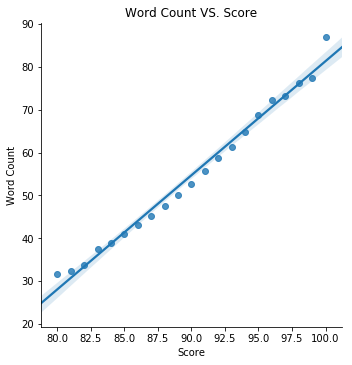

In [16]:
# Create graph 
graph = sns.lmplot(x="Score", y="Average Word Count", data=wordData, aspect=1)
graph.set(xlabel="Score", ylabel="Word Count")
plt.title("Word Count VS. Score")

# # save graph 
# plt.savefig("team_roster_ex.png")

In [17]:
#calulate the linear regression r-squared and p_value
# SIGNIFICANT
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x=wordData["Score"], y=wordData["Average Word Count"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.9861399043154432
p_value =  4.0399050964539434e-19
